# Assignment 4
Submission from Maria Kagkeli, Maria Regina Lily, Mihai Verzan

Note: this notebook takes around a minute to finish running on our hardware.

## Problem 4-3: Measuring Real Networks

In [2]:
import pandas as pd
import igraph as ig
import networkx as nx

In [3]:
#read and clean-up data
data = pd.read_csv("data/facebook-links.txt.anon", sep="\t", header=None)
data = data.drop(axis = 1, columns = 2)
data.to_csv("data/facebook-links.txt", header=False, index=False, sep="\t")

In [4]:
#read clean-up data into an igraph graph and a networkx graph
G_ig = ig.Graph.Read_Edgelist("data/facebook-links.txt", directed=False)
G_nx = nx.read_edgelist("data/facebook-links.txt", delimiter="\t")

In [5]:
#make graph undirected and simple(no multiple edges)
G_ig = G_ig.simplify(multiple="False", loops="False")
G_nx = G_nx.to_undirected()

### 1. Diameter of graph

In [6]:
largest_comps = G_ig.largest_cliques()
# largest_comps returns two different largest connected components

comp = G_ig.subgraph(largest_comps[0])
diam = comp.diameter()
print("Diameter of largest_component 1 = {}".format(diam))
comp = G_ig.subgraph(largest_comps[1])
diam = comp.diameter()
print("Diameter of largest_component 2 = {}".format(diam))

# if you put these two componenets together and calculate the diameter:
comp = G_ig.subgraph(largest_comps[0]+largest_comps[1])
diam = comp.diameter()
print("Diameter of largest_components 1 and 2  = {}".format(diam))

Diameter of largest_component 1 = 1
Diameter of largest_component 2 = 1
Diameter of largest_components 1 and 2  = 2


### 2. ID and degree of node with highest degree

In [7]:
max_deg = G_ig.maxdegree()
max_node =  G_ig.vs.find(_degree = max_deg).index
print("Node ID = {},\t Degree = {}". format(max_node, max_deg))

Node ID = 2332,	 Degree = 1098


### 3. Number of triangles in the graph

In [8]:
#We could not figure how to do this with igraph, so we did this with networkx
triangles_dict = nx.triangles(G_nx)
triangles_count = sum(triangles_dict.values())/3
print("Number of triangles = {}".format(triangles_count))

Number of triangles = 3501542.0


### 4. Average local clustering coefficient

In [9]:
avg_cc = G_ig.transitivity_avglocal_undirected(mode="zero")
print("Average local clustering coefficient = {}".format(avg_cc))

Average local clustering coefficient = 0.22099020936535468


### 6. Degree Distribution

In [10]:
import matplotlib.pyplot as plt
import collections

#find the degree distribution of original data set
degs_count = collections.Counter(sorted(G_ig.degree()))
# remove the first element because it's zero. this throws off the power law fitting function
deg, cnt = zip(*list(degs_count.items())[1:])
cnt = np.array(cnt)/len(G_ig.degree())

### 5. Power law fitting

In [11]:
from scipy.optimize import curve_fit

# this function defines a power law. we use scipy to optimize its parameters
def func(x, e, a):
    return a * x ** e

popt, pcov = curve_fit(func, deg, cnt)
fit_y = [func(i, *popt) for i in deg]

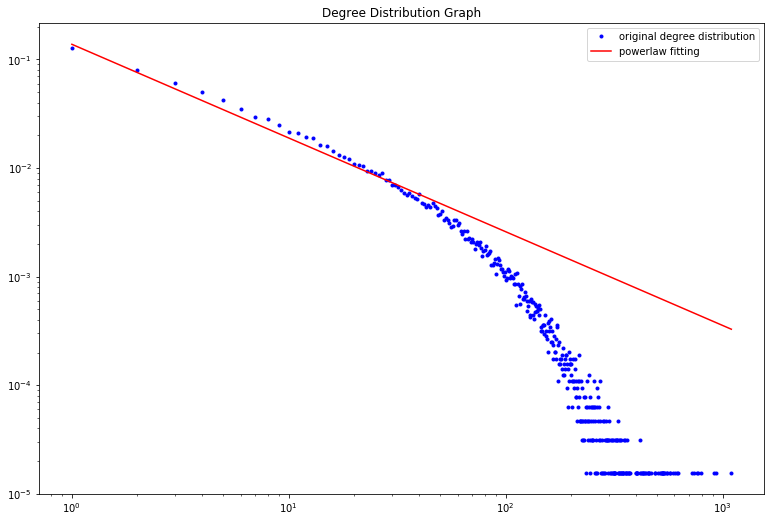

In [13]:
fig, ax = plt.subplots()
fig.set_figwidth(13)
fig.set_figheight(13*2/3)
plt.xscale("log")
plt.yscale("log")

plt.plot(deg, cnt, '.', color='b')
plt.plot(deg, fit_y, color='r')

plt.legend(["original degree distribution", "powerlaw fitting"])
plt.title("Degree Distribution Graph")
plt.show()